# Práctica 5: Algoritmos Cuánticos III

1. Determina el valor de la cadena oculta `s`:
   1. Ejecuta la siguiente celda de código, esta definirá una función llamada `bv_oracle()` que no recibe parámetros y devuelve un circuito cuántico que codifica una cadena `s` de $5$ bits.
      1. `bv_oracle()` representa $U_f$ en el algoritmo de Bernstein–Vazirani.
      2. Dibuja el circuito que regresa la función `bv_oracle()`.
   2. Implementa todo el algoritmo de Bernstein–Vazirani para determinar la cadena `s`.
      1. Considera que el qubit de más a la izquierda (en este caso $q_5$) es el qubit auxiliar.
        - Nota que `bv_oracle()` tiene el qubit auxiliar del otro lado comparado con el ejemplo visto en este notebook (Lab5, sección 1).
      2. Comprueba la estructura del circuito de $U_f$ dibujando tu circuito. ¿Puedes comprobar si tu resultado es correcto (o no) solo observando este circuito?
      3. Usa el parámetro `inplace=True` del método `compose()` de la clase `QuantumCircuit` para agregar el circuito del oráculo en el punto deseado (paso 3).
   3. Realiza la simulación del circuito usando la clase `BasicSimulator` (como en el ejemplo de este Lab5).
       - Está prohibido usar Qiskit Aer (`qiskit-aer`). Muchos ejemplos en internet usan Qiskit Aer, pero no se puede usar en las tareas, así que realiza la adecuación pertinente del código.
   4. Responde claramente cuál es la cadena oculta `s`.
       - Usa una celda de markdown, en donde escribas la cadena $s$ tu mismo(a) a modo de conclusión.

In [31]:
exec(bytes.fromhex('0a66726f6d207169736b697420696d706f7274205175616e74756d436972637569740a0a6465662062765f6f7261636c6528293a0a2020202073203d20223131303130220a202020206e203d206c656e2873290a2020202073203d20735b3a3a2d315d202320726576657274696d6f73206c6120636164656e612079612071756520735f3020657374c3a12061206c6120697a7175696572646120736567c3ba6e20507974686f6e2c7920656e206c61206465726563686120736567c3ba6e205169736b69740a0a2020202063697263756974203d205175616e74756d43697263756974286e202b2031290a20202020636972637569742e6261727269657228290a0a20202020666f72206920696e2072616e6765286e293a0a2020202020202020696620735b695d203d3d202731273a0a202020202020202020202020636972637569742e63782869202b20312c2030290a0a20202020636972637569742e6261727269657228290a2020202072657475726e20636972637569740a20202020'))

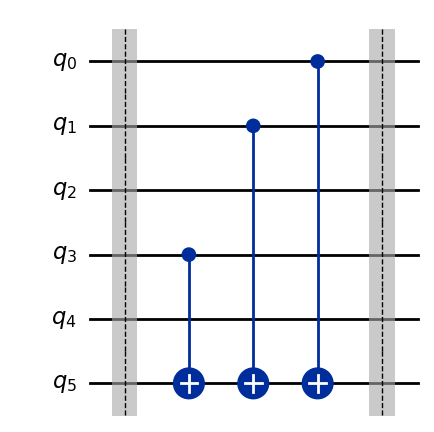

In [40]:
circuit_oracle = bv_oracle()
circuit_oracle2 = circuit_oracle.reverse_bits() #cambia de lugar los qubit segun lo indicado en el ejercicio

circuit_oracle2.draw('mpl')

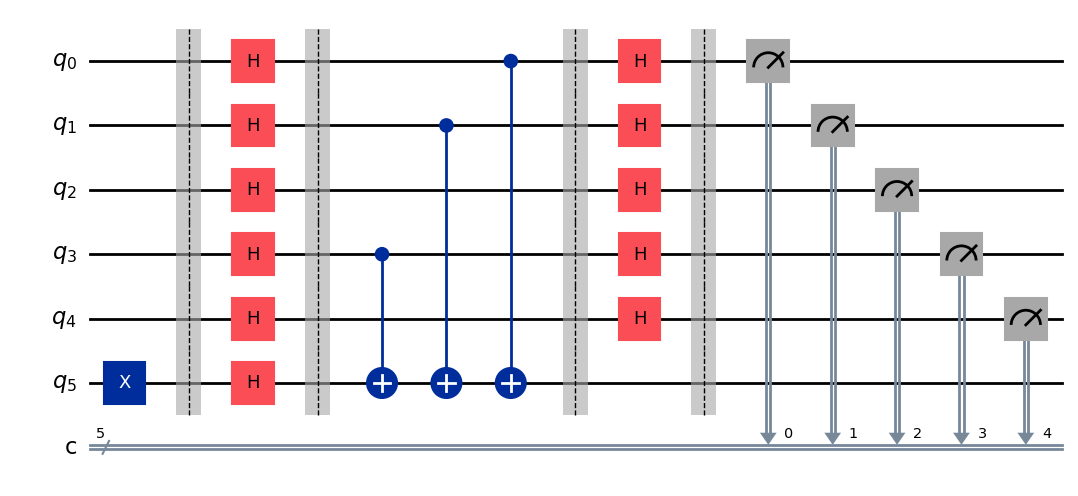

In [41]:
from qiskit import transpile, assemble
from qiskit.visualization import plot_histogram

n = 5  

bv_circuit = QuantumCircuit(n + 1, n)

bv_circuit.x(n)
bv_circuit.barrier()
bv_circuit.h(n)

for qubit in range(n):
    bv_circuit.h(qubit)
#bv_circuit.barrier()

bv_circuit.compose(circuit_oracle2, inplace=True)
#bv_circuit.barrier()

for qubit in range(n):
    bv_circuit.h(qubit)
bv_circuit.barrier()

#Medición
for qubit in range(n):
    bv_circuit.measure(qubit, qubit)

#Graficación
bv_circuit.draw('mpl')

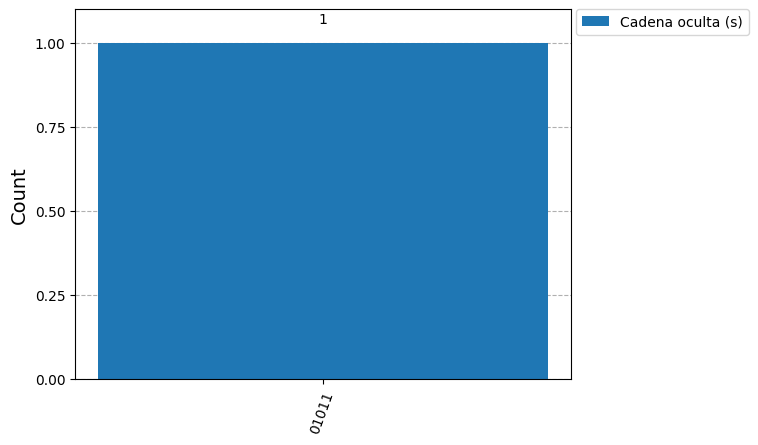

In [42]:
from qiskit.providers.basic_provider import BasicSimulator
from qiskit.visualization import plot_histogram

sim_basic = BasicSimulator()                

job_sampler = sim_basic.run(bv_circuit, shots=1)   

conteos = job_sampler.result().get_counts()

legend = ["Cadena oculta (s)"]
plot_histogram([conteos], legend=legend)

La cadena oculta (s) es por lo tanto y como se muestra en la simulación 01011, mediante la implementación del algoritmo pudimos encontrarla, ya que a simple vista no es tan evidente, por lo que despues de aplicar las compuertas necesarias llegamos al resultado.

2. Realiza el algoritmo de Grover para $n=5$.
   1. Haz una función de oráculo que marque los elementos $|01100\rangle$, $|11001\rangle$ y $|01010\rangle$.
   2. Ejecuta el algorimto completo y comprueba que dichos elementos fueron encontrados por el algoritmo de búsqueda de Grover.
   3. Recuerda que debes determinar el número apropiado de iteraciones a usar en tu algoritmo.
   5. Realiza la simulación del circuito usando la clase `StatevectorSampler` (como en el ejemplo de este Lab5).
      - Está prohibido usar Qiskit Aer (`qiskit-aer`). Muchos ejemplos en internet usan Qiskit Aer, pero no se puede usar en las tareas, así que realiza la adecuación pertinente del código.
     
$$ $$

Estado final del sistema (vector de estado):
Statevector([-0.1767767+0.j, -0.1767767+0.j, -0.1767767+0.j,
             -0.1767767+0.j,  0.1767767+0.j,  0.1767767+0.j,
              0.1767767+0.j,  0.1767767+0.j,  0.1767767+0.j,
              0.1767767+0.j,  0.1767767+0.j,  0.1767767+0.j,
             -0.1767767+0.j, -0.1767767+0.j, -0.1767767+0.j,
             -0.1767767+0.j, -0.1767767+0.j, -0.1767767+0.j,
             -0.1767767+0.j, -0.1767767+0.j,  0.1767767+0.j,
              0.1767767+0.j,  0.1767767+0.j,  0.1767767+0.j,
              0.1767767+0.j,  0.1767767+0.j,  0.1767767+0.j,
              0.1767767+0.j, -0.1767767+0.j, -0.1767767+0.j,
             -0.1767767+0.j, -0.1767767+0.j],
            dims=(2, 2, 2, 2, 2))


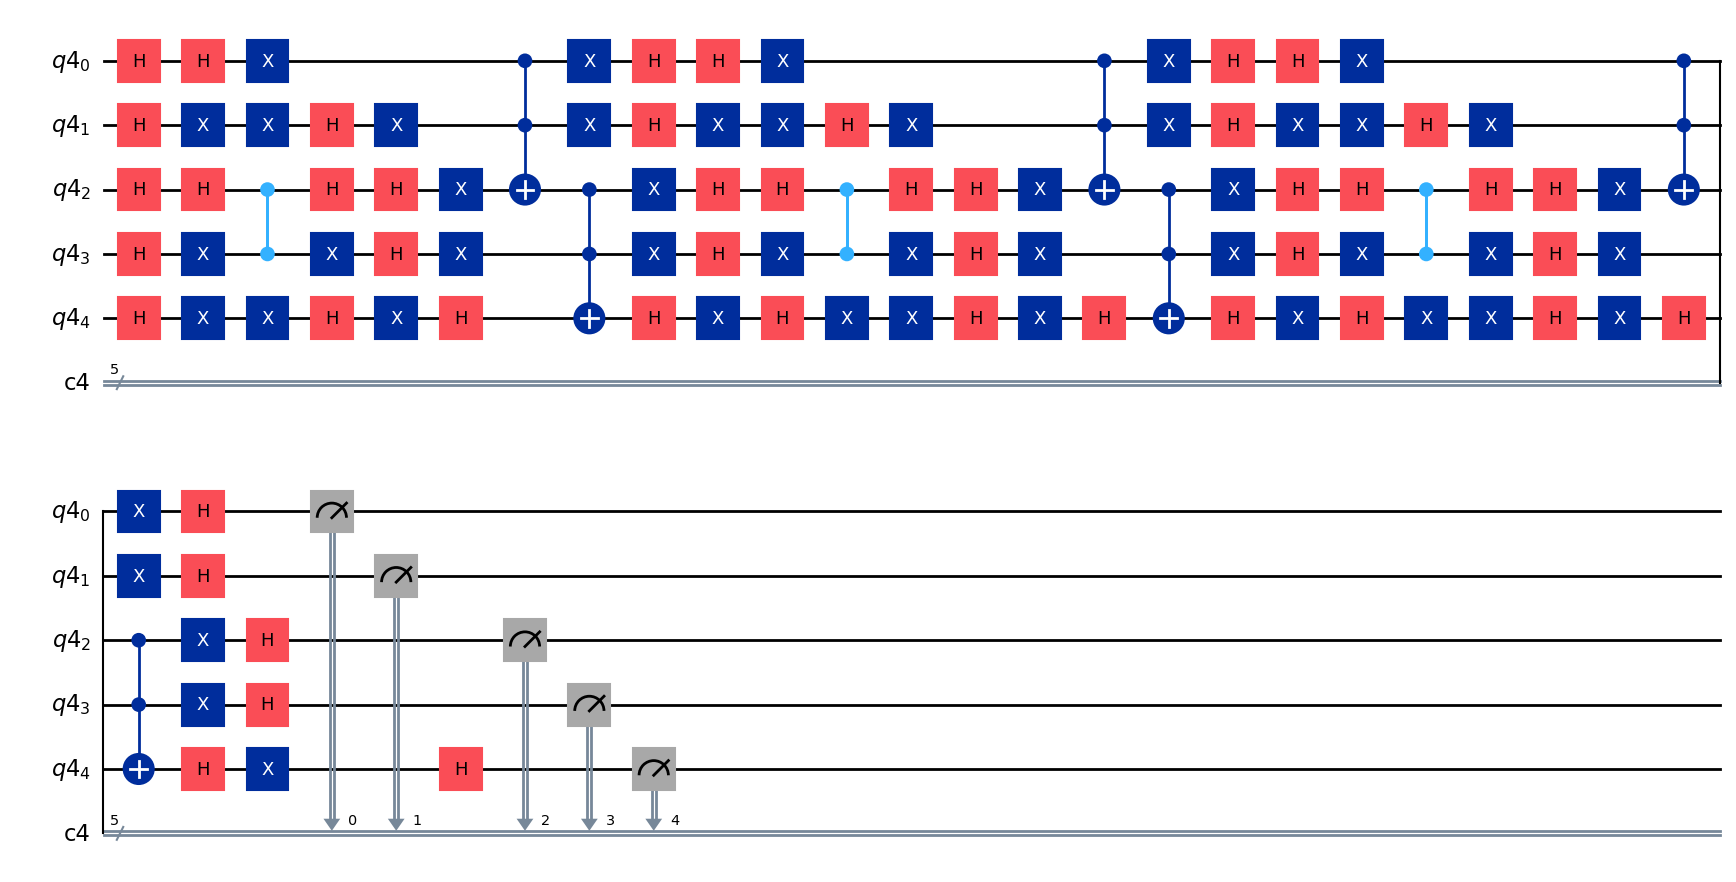

In [43]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.quantum_info import Statevector
import numpy as np

# 1. Definimos el oráculo para los estados |01100>, |11001>, |01010>
def oracle(circuit, n):
    # Marcamos los estados |01100>, |11001>, |01010> con un operador Z (X, Z)
    # Para |01100>, |11001>, |01010> usaremos Xs y Zs para invertir su signo
    circuit.x([1, 3, 4])  # Cambiamos estos qubits para marcarlos como |01100>, |11001>, |01010>
    circuit.h(2)
    circuit.cz(2, 3)  # Usamos CZ como ejemplo, se personalizará para los objetivos
    circuit.h(2)
    circuit.x([1, 3, 4])  # Restauramos

def diffusion_operator(circuit, n):
    for qubit in range(n):
        circuit.h(qubit)
        circuit.x(qubit)
    
    circuit.h(n - 1)  # Hadamard en el último qubit (objetivo)
    circuit.ccx(0, 1, 2)  # Aplicamos CCX a los primeros controles
    circuit.ccx(2, 3, n - 1)  # Y luego al último con el objetivo
    circuit.h(n - 1)  # Restauramos el último qubit
    
    # Regresamos todos los qubits al estado original
    for qubit in range(n):
        circuit.x(qubit)
        circuit.h(qubit)

# 3. Crear un circuito con 5 qubits
n = 5
qr = QuantumRegister(n)
cr = ClassicalRegister(n)
grover_circuit = QuantumCircuit(qr, cr)

# Inicialización: Preparamos los qubits en el estado |+>
grover_circuit.h(qr)  # Aplicamos Hadamard a todos los qubits

# Número de iteraciones de Grover
iterations = 3

# Ejecutamos el algoritmo de Grover
for _ in range(iterations):
    oracle(grover_circuit, n)  # Aplicamos el oráculo
    diffusion_operator(grover_circuit, n)

# Obtenemos el estado final usando Statevector
statevector = Statevector.from_instruction(grover_circuit)

# Mostrar el estado final del sistema
print("Estado final del sistema (vector de estado):")
print(statevector)

# Medimos el circuito y mostramos el circuito completo
grover_circuit.measure(qr, cr)
grover_circuit.draw('mpl')
